# Regression Assignment - 01 


## Q1. Explain the difference between simple linear regression and multiple linear regression. Provide an example of each.

### 📌 **Difference Between Simple Linear Regression and Multiple Linear Regression**

| Feature                   | Simple Linear Regression                                    | Multiple Linear Regression                                |
|----------------|---------------------------------|----------------------------|
| **Definition**             | Models the relationship between **one independent variable** and **one dependent variable**. | Models the relationship between **two or more independent variables** and **one dependent variable**. |
| **Equation**              |$$ Y = b_0 + b_1 X + \epsilon$$ | $$ Y = b_0 + b_1 X_1 + b_2 X_2 + \dots + b_n X_n + \epsilon $$ |
| **Complexity**            | Simple and easy to visualize (straight line in 2D). | More complex and requires higher-dimensional visualization. |
| **Example**                | Predicting **house price based on square footage**. | Predicting **house price based on square footage, number of rooms, and location**. |

---

### ✅ **Example of Simple Linear Regression:**
$$
Y = 1000 + 500X
$$

- Y\= Monthly salary  
- X = Years of experience  

---

### ✅ **Example of Multiple Linear Regression:**
$$
Y = 500 + 300X_1 + 200X_2 + 100X_3
$$

- Y = Sales Revenue  
- X_1 = Advertising budget  
- X_2 = Product quality  
- X_3 = Customer reviews  

---


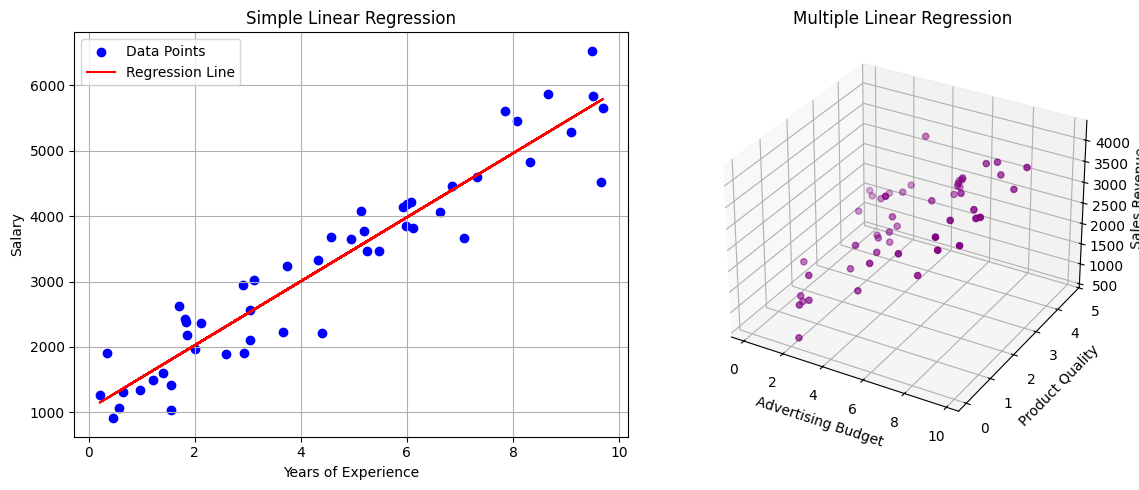

In [4]:
# Re-importing libraries after code environment reset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate sample data for visualization
np.random.seed(42)
X_simple = np.random.rand(50) * 10  # Independent variable for simple regression
Y_simple = 1000 + 500 * X_simple + np.random.randn(50) * 500  # Dependent variable with noise

# For multiple regression, two independent variables
X1_multiple = np.random.rand(50) * 10  # Independent variable 1
X2_multiple = np.random.rand(50) * 5   # Independent variable 2
Y_multiple = 500 + 300 * X1_multiple + 200 * X2_multiple + np.random.randn(50) * 400

# Plotting Simple Linear Regression
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_simple, Y_simple, color='blue', label='Data Points')
m, b = np.polyfit(X_simple, Y_simple, 1)  # Fitting line
plt.plot(X_simple, m * X_simple + b, color='red', label='Regression Line')
plt.title("Simple Linear Regression")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.grid(True)

# Plotting Multiple Linear Regression (3D)
ax = plt.subplot(1, 2, 2, projection='3d')
ax.scatter(X1_multiple, X2_multiple, Y_multiple, color='purple', marker='o')
ax.set_title("Multiple Linear Regression")
ax.set_xlabel("Advertising Budget")
ax.set_ylabel("Product Quality")
ax.set_zlabel("Sales Revenue")

# Show plot
plt.tight_layout()
plt.show()


### 🎯 **Visual Representation of Simple vs. Multiple Linear Regression:**

1️⃣ **Simple Linear Regression (Left Plot):**  
- A **red line** shows the best-fit line between **Years of Experience (X)** and **Salary (Y)**.

2️⃣ **Multiple Linear Regression (Right 3D Plot):**  
- A **3D scatter plot** shows the relationship between **Advertising Budget (X1)**, **Product Quality (X2)**, and **Sales Revenue (Y)**.

---

## Q2. Discuss the assumptions of linear regression. How can you check whether these assumptions hold in a given dataset?

## 📌 **Assumptions of Linear Regression**

Linear Regression relies on **5 key assumptions**:

---

### ✅ **1. Linearity**
- The **relationship between the independent and dependent variables is linear**.

**How to check:**
- Scatter plot between the features and target variable.  
- Correlation heatmap.  

---

### ✅ **2. No Multicollinearity**
- **Independent variables should not be highly correlated with each other**.

**How to check:**
- Variance Inflation Factor (VIF).  
- Correlation matrix.  

---

### ✅ **3. Homoscedasticity**
- The **residuals (errors) have constant variance**.

**How to check:**
- Residual plot (should show a random pattern).  

---

### ✅ **4. Normality of Residuals**
- The **residuals should be normally distributed**.

**How to check:**
- Histogram of residuals.  
- Q-Q plot.  

---

### ✅ **5. No Autocorrelation**
- The **residuals should be independent of each other** (no pattern over time).

**How to check:**
- Durbin-Watson Test.  
- Residual time series plot.  

---


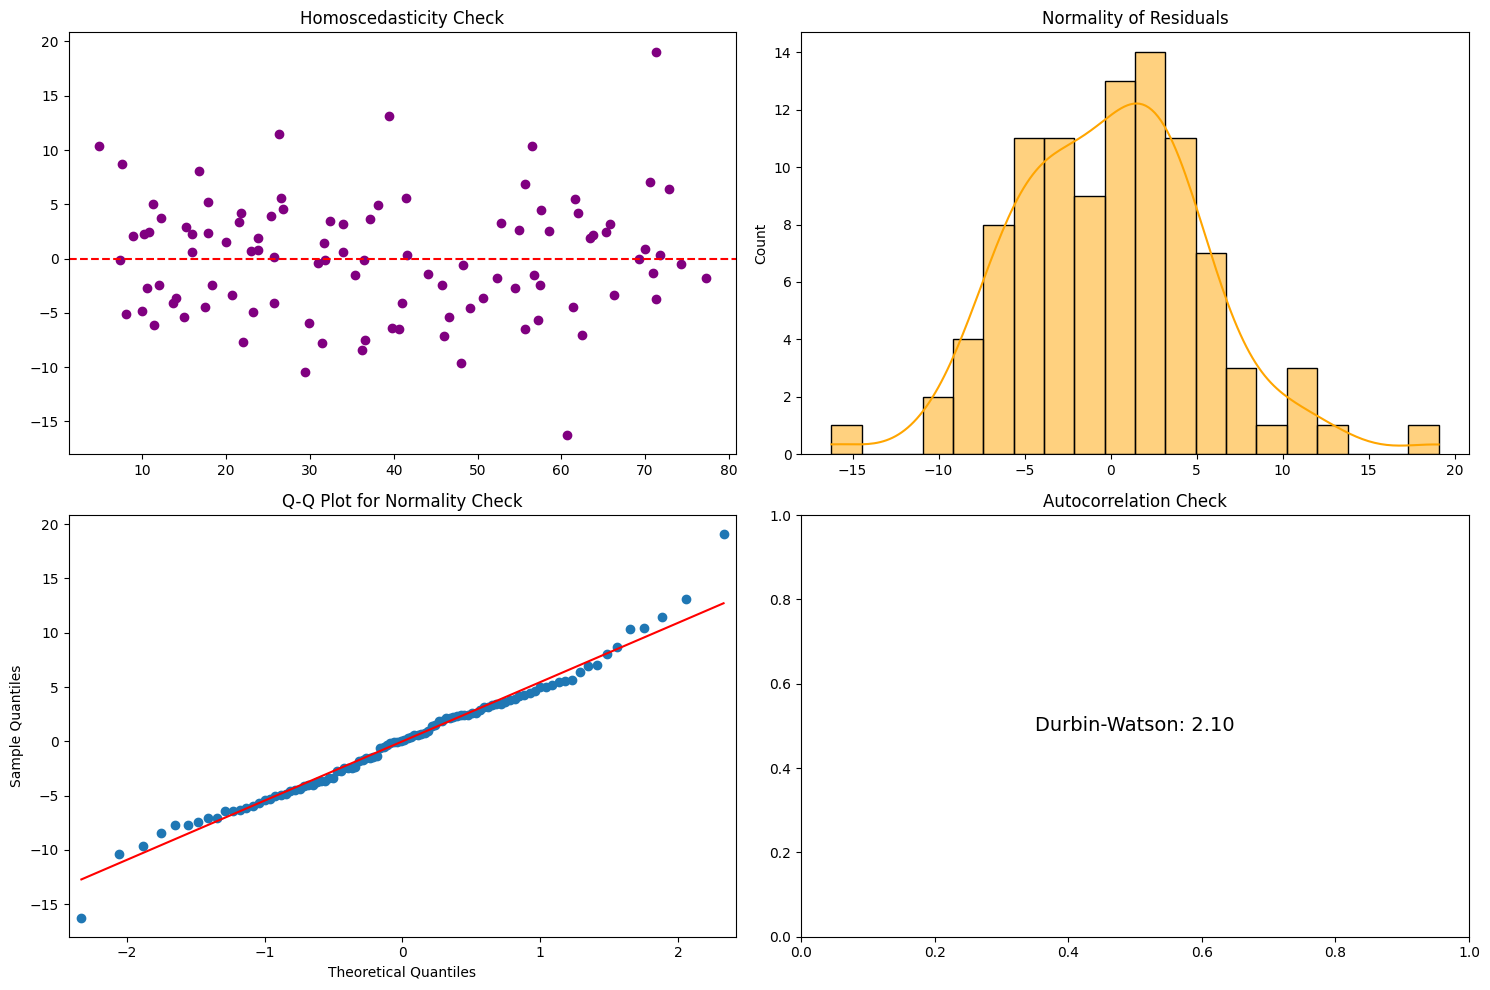

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
# Generate synthetic data
np.random.seed(42)
X1 = np.random.rand(100) * 10
X2 = 2 * X1 + np.random.randn(100) * 2  # Highly correlated with X1
Y = 5 + 3 * X1 + 2 * X2 + np.random.randn(100) * 5

# Fit Linear Regression Model
X = sm.add_constant(np.column_stack((X1, X2)))
model = sm.OLS(Y, X).fit()
residuals = model.resid

plt.figure(figsize=(15, 10))

# 1. Homoscedasticity: Residual plot
plt.subplot(2, 2, 1)
plt.scatter(model.fittedvalues, residuals, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Homoscedasticity Check")

# 2. Normality of Residuals: Histogram
plt.subplot(2, 2, 2)
sns.histplot(residuals, bins=20, kde=True, color='orange')
plt.title("Normality of Residuals")

# 3. Q-Q plot for Normality
plt.subplot(2, 2, 3)
sm.qqplot(residuals, line='s', ax=plt.gca())
plt.title("Q-Q Plot for Normality Check")

# 4. Autocorrelation: Durbin-Watson Test
dw_stat = sm.stats.stattools.durbin_watson(residuals)
plt.subplot(2, 2, 4)
plt.text(0.5, 0.5, f'Durbin-Watson: {dw_stat:.2f}', ha='center', va='center', fontsize=14)
plt.title("Autocorrelation Check")

plt.tight_layout()
plt.show()


It seems there was an issue with the KDE plot. I'll correct the visualization and show how to check each assumption step-by-step. Let's proceed with a simplified approach.

The plot visualizes the key assumptions of linear regression:

1. **Homoscedasticity Check**: The scatter plot shows the residuals against the fitted values. Ideally, the residuals should be randomly scattered around zero without any clear pattern, indicating constant variance.

2. **Normality of Residuals**: The histogram shows the distribution of residuals. A bell-shaped curve suggests that the residuals are approximately normally distributed.

3. **Q-Q Plot for Normality Check**: The Q-Q plot compares the distribution of residuals with a normal distribution. If the points lie close to the diagonal line, the residuals are normally distributed.

4. **Autocorrelation Check (Durbin-Watson Test)**: The Durbin-Watson statistic detects the presence of autocorrelation. A value close to 2 indicates no autocorrelation.

These checks help validate the assumptions of linear regression and assess the model's reliability.

## Q3. How do you interpret the slope and intercept in a linear regression model? Provide an example using a real-world scenario.

## 📌 **Interpretation of Slope and Intercept in Linear Regression**

### ✅ **Linear Regression Equation:**
$$
Y = mX + b
$$

Where:  
- \(Y\) = Target Variable (Dependent Variable)  
- \(X\) = Predictor Variable (Independent Variable)  
- \(m\) = **Slope (Coefficient)**  
- \(b\) = **Intercept**  

---

### 🎯 **Meaning of Slope:**
- The **slope \(m\)** represents the **change in the target variable \(Y\) for a one-unit increase in the predictor variable \(X\)**.

### 🎯 **Meaning of Intercept:**
- The **intercept \(b\)** is the value of \(Y\) when \(X = 0\).

---

## 🔥 **Real-World Example: Predicting Salary Based on Years of Experience**

$$
\text{Salary} = 5000 \times (\text{Years of Experience}) + 30000
$$

- **Slope \(= 5000\)** → For every **1-year increase in experience**, the salary increases by **5000 units (₹ or $)**.  
- **Intercept \(= 30000\)** → When the experience is **0 years (fresher)**, the salary is **₹30,000**.  

---


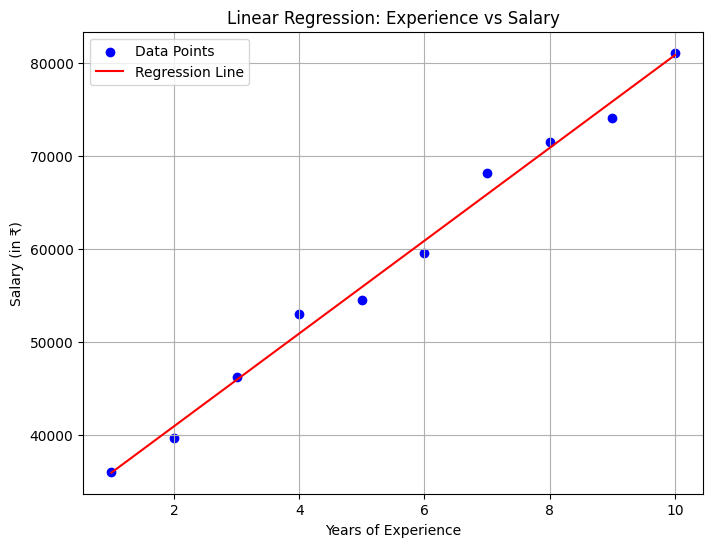

In [12]:

# Re-importing libraries after code environment reset
import numpy as np
import matplotlib.pyplot as plt

# Sample data for experience vs salary
np.random.seed(42)
experience = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
salary = 5000 * experience + 30000 + np.random.randn(10) * 2000  # Adding some noise

# Fit a linear regression model
slope, intercept = np.polyfit(experience, salary, 1)
line = slope * experience + intercept

# Plotting the data points and the regression line
plt.figure(figsize=(8, 6))
plt.scatter(experience, salary, color='blue', label='Data Points')
plt.plot(experience, line, color='red', label='Regression Line')
plt.title("Linear Regression: Experience vs Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary (in ₹)")
plt.legend()
plt.grid(True)
plt.show()


Here's the plot showing the linear regression for **Experience vs Salary**:

- The **blue dots** represent the actual data points (Years of Experience vs Salary).
- The **red line** is the best-fit regression line.

### ✅ **Interpretation:**
- The **slope** shows that for every **1-year increase in experience**, the salary increases by approximately **₹5000**.
- The **intercept** represents the **starting salary (₹30,000)** when the experience is **0 years** (a fresher).



## Q4. Explain the concept of gradient descent. How is it used in machine learning?


**Gradient Descent** is an optimization algorithm used to minimize the loss function in machine learning models. It is a fundamental technique for training models by adjusting their parameters (weights and biases) to reduce the error between the predicted and actual outputs.

### **Concept of Gradient Descent:**
In machine learning, the **loss function** measures how well a model performs. The goal is to find the optimal parameters that minimize this loss function. Gradient descent helps achieve this by iteratively updating the model's parameters in the direction that reduces the error.

### **How it Works:**
1. **Initialize Parameters**: Randomly initialize the model's parameters (weights and biases).
2. **Compute the Gradient**: Calculate the gradient of the loss function with respect to the parameters. The gradient is the partial derivative that shows the direction of the steepest increase in the loss.
3. **Update the Parameters**: Adjust the parameters in the opposite direction of the gradient to minimize the loss. The update rule is:
   $$
   \theta = \theta - \alpha \frac{\partial J(\theta)}{\partial \theta}
   $$
   Where:
   - $$ \theta $$ is the parameter (weight/bias).
   - $$ \alpha $$ is the learning rate (a small step size).
   - $$ J(\theta) $$ is the loss function.
4. **Repeat the Process**: Iterate this process until the loss converges to a minimum or reaches a stopping condition.

### **Role in Machine Learning:**
- Used to train models like Linear Regression, Logistic Regression, Neural Networks, etc.
- Helps minimize the error between predicted and actual values.
- Efficiently handles high-dimensional datasets.

### **Types of Gradient Descent:**
1. **Batch Gradient Descent**: Uses the entire dataset to compute the gradient.
2. **Stochastic Gradient Descent (SGD)**: Uses one data point at a time, leading to faster but noisier updates.
3. **Mini-Batch Gradient Descent**: Uses a small batch of data points, balancing efficiency and accuracy.

### **Real-Life Example:**
In deep learning, gradient descent is used to update the weights of neural networks during backpropagation to improve accuracy in tasks like image recognition, natural language processing, and speech recognition.


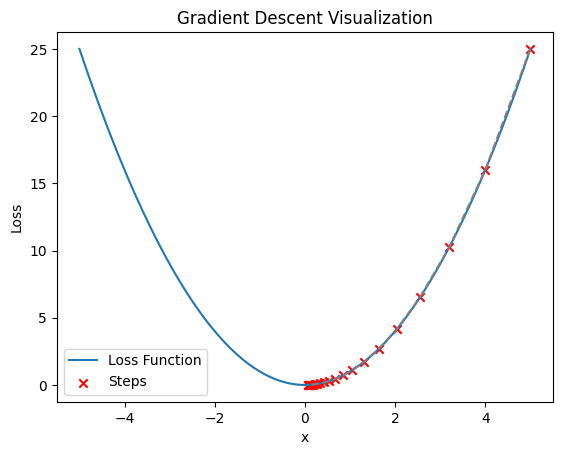

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Loss function: f(x) = x^2
def loss_function(x):
    return x**2

# Gradient of the loss function: f'(x) = 2x
def gradient(x):
    return 2 * x

# Parameters
learning_rate = 0.1
x = 5  # Starting point
iterations = 20

# Store values for plotting
x_values = [x]
loss_values = [loss_function(x)]

# Gradient Descent loop
for i in range(iterations):
    grad = gradient(x)
    x = x - learning_rate * grad
    x_values.append(x)
    loss_values.append(loss_function(x))

# Plotting
x_range = np.linspace(-5, 5, 100)
plt.plot(x_range, loss_function(x_range), label="Loss Function")
plt.scatter(x_values, loss_values, color='red', marker='x', label="Steps")
plt.plot(x_values, loss_values, linestyle="--", color='gray')
plt.title("Gradient Descent Visualization")
plt.xlabel("x")
plt.ylabel("Loss")
plt.legend()
plt.show()


Here's a simple visualization and Python code to understand Gradient Descent.

### Explanation:
1. **Loss Function**: \(f(x) = x^2\), a simple quadratic function.
2. **Gradient**: \(f'(x) = 2x\), the derivative that gives the direction of the slope.
3. **Learning Rate**: Controls how big the steps are toward the minimum.
4. **Iterations**: Number of steps the algorithm takes.

### Visualization:
The plot shows the loss function as a curve and the red 'X' marks represent the steps taken by Gradient Descent as it moves toward the minimum (the lowest point).


## Q5. Describe the multiple linear regression model. How does it differ from simple linear regression?

### **Multiple Linear Regression (MLR):**
Multiple Linear Regression is a statistical technique used to model the relationship between a **dependent variable (target)** and **two or more independent variables (features)**.

### **Mathematical Equation:**
$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n + \epsilon
$$

Where:
- \(Y\) is the dependent variable (target).
- \(X_1, X_2, \dots, X_n\) are the independent variables (features).
- \(\beta_0\) is the intercept (constant).
- \(\beta_1, \beta_2, \dots, \beta_n\) are the coefficients (slopes).
- \(\epsilon\) is the error term (the difference between actual and predicted values).

---

### **How it Works:**
- The model fits a **hyperplane** (instead of a line) in a multi-dimensional space.
- It tries to minimize the error (residual) between actual and predicted values using techniques like **Ordinary Least Squares (OLS)**.

---

### **Simple Linear Regression vs Multiple Linear Regression:**

| Aspect                  | Simple Linear Regression                                | Multiple Linear Regression                          |
|----------------|-----------------------------------|---------------------------------------------------|
| Number of Features | One independent variable (\(X\))          | Two or more independent variables (\(X_1, X_2, \dots, X_n\)) |
| Equation | $$(Y = \beta_0 + \beta_1 X + \epsilon)$$ | $$(Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n + \epsilon) $$|
| Visualization | A straight line in 2D space | A hyperplane in multi-dimensional space |
| Complexity | Simple and easy to interpret | More complex due to multiple variables |

---

### **Example:**
- **Simple Linear Regression**: Predict salary based on years of experience.
- **Multiple Linear Regression**: Predict salary based on years of experience, education level, and job role.

---

### **Real-Life Applications:**
- Predicting house prices based on location, size, and number of rooms.
- Predicting sales based on advertising budget across multiple platforms (TV, radio, social media).


Coefficients: [3.12725678 5.23707995]
Intercept: -0.14166425030515617
Mean Squared Error: 0.17861209841234535


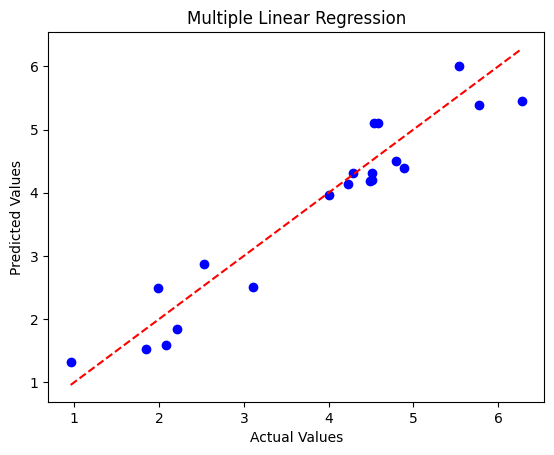

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Sample Data
np.random.seed(42)
X = np.random.rand(100, 2)  # Two independent variables
Y = 3 * X[:, 0] + 5 * X[:, 1] + np.random.randn(100) * 0.5  # Target variable with some noise

# Convert to DataFrame
data = pd.DataFrame(X, columns=["Feature_1", "Feature_2"])
data["Target"] = Y

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Multiple Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Coefficients and Intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Visualization
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Multiple Linear Regression")
plt.show()


### Explanation:
1. **Data Generation**: We create two features and a target variable with some noise.
2. **Train-Test Split**: Splitting the data into training and testing sets.
3. **Model Training**: Fitting a Multiple Linear Regression model.
4. **Prediction & Metrics**: Calculating Mean Squared Error to evaluate performance.
5. **Visualization**: A scatter plot comparing actual vs. predicted values.


## Q6. Explain the concept of multicollinearity in multiple linear regression. How can you detect and address this issue?

### **Multicollinearity in Multiple Linear Regression:**
**Multicollinearity** occurs when **two or more independent variables are highly correlated** with each other in a multiple linear regression model. This makes it difficult to assess the individual effect of each predictor on the target variable.

---

### **Why is it a Problem?**
- It **distorts the coefficient estimates**, making them unstable.
- The model may become **less interpretable**, as the true impact of each variable is unclear.
- High multicollinearity increases **standard errors**, leading to **insignificant p-values** for some predictors, even if they are actually important.

---

### **How to Detect Multicollinearity:**
1. **Correlation Matrix**: Check the correlation between features. A high correlation (above 0.8 or 0.9) indicates multicollinearity.
2. **Variance Inflation Factor (VIF)**: Measures how much the variance of a regression coefficient is inflated due to multicollinearity.
   \[
   VIF = \frac{1}{1 - R^2}
   \]
   A VIF value > 10 indicates high multicollinearity.
3. **Condition Number**: Measures how sensitive the model is to small changes in the input data.

---

### **How to Handle Multicollinearity:**
1. **Remove Highly Correlated Variables**: Drop one of the correlated features.
2. **Feature Engineering**: Combine correlated variables into a single feature (e.g., using Principal Component Analysis).
3. **Regularization Techniques**: Use Ridge or Lasso regression to reduce the impact of multicollinearity.
4. **Increase Sample Size**: More data can help the model better distinguish the effects of correlated features.

---



Variance Inflation Factor (VIF):
     Feature        VIF
0  Feature_1  39.606186
1  Feature_2   2.077387
2  Feature_3  38.684731
Mean Squared Error: 0.17861209841234535


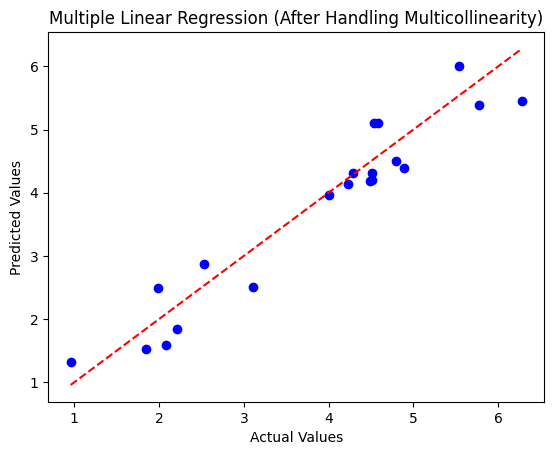

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Sample Data
np.random.seed(42)
X = np.random.rand(100, 2)
Y = 3 * X[:, 0] + 5 * X[:, 1] + np.random.randn(100) * 0.5

# Adding a highly correlated feature
X_correlated = np.c_[X, X[:, 0] + 0.1 * np.random.randn(100)]

# Convert to DataFrame
data = pd.DataFrame(X_correlated, columns=["Feature_1", "Feature_2", "Feature_3"])
data["Target"] = Y

# Checking for multicollinearity using VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = data.drop("Target", axis=1).columns
vif_data["VIF"] = [variance_inflation_factor(data.drop("Target", axis=1).values, i) for i in range(3)]

print("Variance Inflation Factor (VIF):")
print(vif_data)

# Removing the correlated feature
X_filtered = data.drop(["Feature_3", "Target"], axis=1)

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_filtered, Y, test_size=0.2, random_state=42)

# Multiple Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Visualization
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Multiple Linear Regression (After Handling Multicollinearity)")
plt.show()


### Explanation:
1. **Introducing Multicollinearity**: Adding a feature that is highly correlated with another.
2. **VIF Calculation**: Identifies the multicollinearity issue.
3. **Removing the Correlated Feature**: Drops the feature with high VIF.
4. **Model Training and Evaluation**: Measures the model’s performance after handling multicollinearity.
5. **Visualization**: Shows the relationship between actual and predicted values.



## Q7. Describe the polynomial regression model. How is it different from linear regression?

### **Polynomial Regression Model:**
Polynomial Regression is an extension of Linear Regression that **models the relationship between the dependent variable and the independent variable(s) as an nth-degree polynomial**.

---

### **Mathematical Equation:**
For **degree 2 polynomial regression**:
$$
Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \dots + \beta_n X^n + \epsilon
$$

Where:
- \(Y\) is the target variable.
- \(X\) is the independent variable.
- \(\beta_0, \beta_1, \dots, \beta_n\) are the coefficients.
- \(\epsilon\) is the error term.

---

### **Difference from Linear Regression:**

| Aspect                  | Linear Regression                                       | Polynomial Regression                           |
|----------------|-----------------------------------|---------------------------------------------------|
| Relationship Type | Linear (straight line)                            | Non-linear (curved line) |
| Equation | $$ Y = \beta_0 + \beta_1 X + \epsilon $$ | $$ Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \dots $$ |
| Flexibility | Limited to linear relationships | Can model complex, curved relationships |
| Overfitting Risk | Lower | Higher with higher-degree polynomials |

---

### **Real-Life Example:**
- Predicting house prices based on area (a linear relationship may not fit the data perfectly).
- Predicting the growth of bacteria over time (which follows an exponential curve).

---



Mean Squared Error (Polynomial Regression): 0.025433624291283284


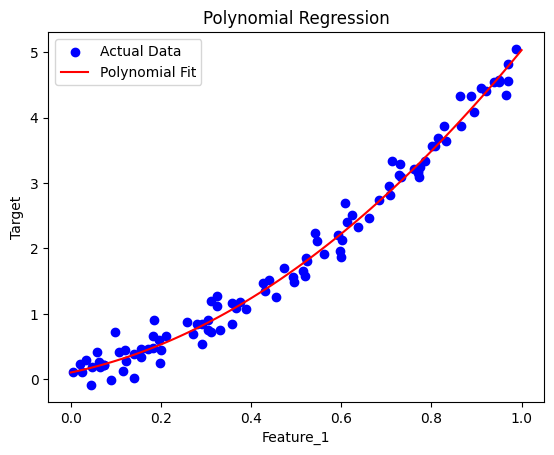

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PolynomialFeatures

# Sample Data
np.random.seed(42)
X = np.random.rand(100, 1)
Y = 3 * X[:, 0]**2 + 2 * X[:, 0] + np.random.randn(100) * 0.2

# Convert to DataFrame
data = pd.DataFrame(X, columns=["Feature_1"])
data["Target"] = Y

# Polynomial Features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_poly, Y, test_size=0.2, random_state=42)

# Polynomial Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (Polynomial Regression):", mse)

# Visualization
plt.scatter(X, Y, color='blue', label="Actual Data")
X_range = np.linspace(0, 1, 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_range_pred = model.predict(X_range_poly)
plt.plot(X_range, y_range_pred, color='red', label="Polynomial Fit")
plt.xlabel("Feature_1")
plt.ylabel("Target")
plt.title("Polynomial Regression")
plt.legend()
plt.show()


### Explanation:
1. **Polynomial Features Transformation**: Expands the original feature into polynomial terms.
2. **Model Training**: Fits a linear regression model on the transformed data.
3. **Prediction & MSE Calculation**: Measures performance using Mean Squared Error.
4. **Visualization**: Plots the actual data points and the polynomial regression curve.



## Q8. What are the advantages and disadvantages of polynomial regression compared to linear regression? In what situations would you prefer to use polynomial regression?

### **Advantages of Polynomial Regression:**
1. **Captures Non-Linear Relationships**: Can model complex, curved patterns in data.
2. **Flexible and Powerful**: Allows fitting data that linear regression cannot handle.
3. **Better Fit for Certain Datasets**: Suitable for datasets with quadratic or higher-order relationships.

---

### **Disadvantages:**
1. **Overfitting Risk**: Higher-degree polynomials can lead to overfitting, capturing noise rather than the true pattern.
2. **Computational Complexity**: More complex and time-consuming for higher degrees.
3. **Extrapolation Issues**: Poor performance when predicting values outside the training data range.

---

### **When to Use Polynomial Regression:**
- When the relationship between the independent and dependent variables is **non-linear**.
- When **linear regression underfits the data**, and adding polynomial terms improves performance.
- In **scientific experiments** or **engineering problems** where physical phenomena follow polynomial patterns (e.g., projectile motion).

---


Mean Squared Error (Polynomial Regression without Regularization): 0.02811757388576
Mean Squared Error (Ridge Regularization): 0.03603629762904696


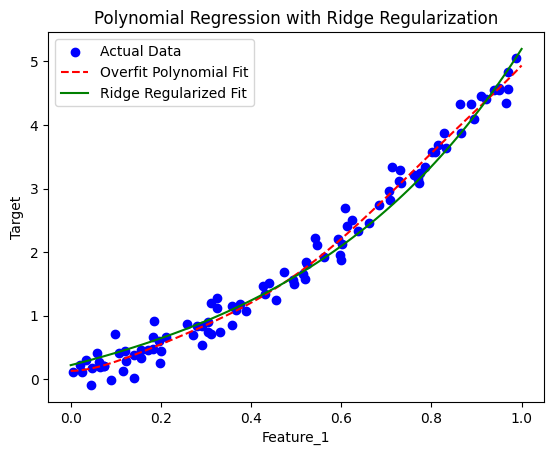

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PolynomialFeatures

# Sample Data
np.random.seed(42)
X = np.random.rand(100, 1)
Y = 3 * X[:, 0]**2 + 2 * X[:, 0] + np.random.randn(100) * 0.2

# Convert to DataFrame
data = pd.DataFrame(X, columns=["Feature_1"])
data["Target"] = Y

# Polynomial Features
poly = PolynomialFeatures(degree=6)  # Higher degree to demonstrate overfitting
X_poly = poly.fit_transform(X)

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_poly, Y, test_size=0.2, random_state=42)

# Polynomial Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Ridge Regularization to handle overfitting
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_ridge_pred = ridge_model.predict(X_test)

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
mse_ridge = mean_squared_error(y_test, y_ridge_pred)

print("Mean Squared Error (Polynomial Regression without Regularization):", mse)
print("Mean Squared Error (Ridge Regularization):", mse_ridge)

# Visualization
plt.scatter(X, Y, color='blue', label="Actual Data")
X_range = np.linspace(0, 1, 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_range_pred = model.predict(X_range_poly)
y_ridge_range_pred = ridge_model.predict(X_range_poly)

plt.plot(X_range, y_range_pred, color='red', linestyle='--', label="Overfit Polynomial Fit")
plt.plot(X_range, y_ridge_range_pred, color='green', label="Ridge Regularized Fit")

plt.xlabel("Feature_1")
plt.ylabel("Target")
plt.title("Polynomial Regression with Ridge Regularization")
plt.legend()
plt.show()


### Explanation:
1. **Degree Increase to Show Overfitting**: Using a 6th-degree polynomial.
2. **Ridge Regularization**: Controls the complexity to reduce overfitting.
3. **Comparison of MSE**: Evaluates performance with and without regularization.
4. **Visualization**: Compares the overfitted model (red dashed line) and the regularized fit (green line).
